In [96]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import time
import sys
sys.path.append("/home/leejinwon/")
from acerxn import chem, process
import compute_chg_and_bo_gurobi
#import compute_chg_and_bo_gurobi2 as compute_chg_and_bo_gurobi
import numpy as np

In [97]:
'''
from compare_all import contain_atom_not_allowed
a = Chem.MolFromSmiles("C(#C[Ge]12CCCN(CCC1)CCC2)c1ccccc1")
print(contain_atom_not_allowed(a))

i = 10
for x in range(20):
    try:
        if x == i:
            raise NotImplementedError
        #print("i:", x)
    except:
        continue
'''

'\nfrom compare_all import contain_atom_not_allowed\na = Chem.MolFromSmiles("C(#C[Ge]12CCCN(CCC1)CCC2)c1ccccc1")\nprint(contain_atom_not_allowed(a))\n\ni = 10\nfor x in range(20):\n    try:\n        if x == i:\n            raise NotImplementedError\n        #print("i:", x)\n    except:\n        continue\n'

In [98]:
smiles = "[H]c1c([H])c([H])c([N+](=O)[O-])c([O-])c1[H]"
#smiles = "[H]C(c1c([H])c([N+](=O)[O-])c([H])c([H])c1[O-])=c1sc2n(c1=O)C([H])(c1c([H])c(OC([H])([H])[H])c([H])c([H])c1OC([H])([H])[H])C1=C(N=2)c2c([H])c([H])c([H])c([H])c2C([H])([H])C1([H])[H]"
#smiles = "[H]OC([H])([H])c1c([H])c([H])c(C2([H])OC([H])(c3c([H])c([H])c([H])c(N([H])C(=O)C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])[H])c3[H])OC([H])(C([H])([H])Sc3c([H])c([H])c([H])c([H])[n+]3[O-])C2([H])[H])c([H])c1[H]"
#smiles = "[H]c1sc(C([H])([H])c2nnn(C([H])(C(=O)OC([H])([H])[H])C([H])([H])C([H])([H])C([H])(N=[N+]=[N-])C(=O)OC([H])([H])[H])n2)c([H])c1[H]"
#smiles = "[H]c1c([H])c([H])n2c(=O)c3c([H])c(C(=O)N([H])C4([H])C([H])([H])C([H])([H])C([H])([H])C4([H])[H])c(N([H])[H])[n+](C([H])([H])C4([H])OC([H])([H])C([H])([H])C4([H])[H])c3nc2c1[H]"
#smiles = "[H]c1c([H])c([H])c(C([H])([H])N2c3c(c(C([H])([H])OC([H])([H])[H])c([H])c(C([H])([H])[H])[n+]3[H])C(=O)N3C(=O)c4c([H])c([H])c([H])c([H])c4C32[H])c([H])c1[H]"
#smiles = "[H]c1c([H])c(OC([H])([H])[H])c2c(c1OC([H])([H])[H])C1([H])C([H])([H])C2([H])C2([H])C1([H])C1(C([H])([H])[H])C3([H])C4([H])C([H])([H])C([H])(C5([H])c6c(c([H])c([H])[n+](C([H])([H])[H])c6[H])-c6c([H])c([H])[n+](C([H])([H])[H])c([H])c6C54[H])C3([H])C21C([H])([H])[H]"
#smiles = "[H]c1c(C([H])([H])[H])c([H])[c-]([H])c1[H]"
#smiles = "[H]C(=NN=c1sc2c([H])c(C([H])([H])[H])c([H])c([H])c2n1C([H])([H])c1c([H])c([H])c([H])c([H])c1[H])c1c([H])c([N+](=O)[O-])c([O-])c([H])c1[O-]"
#smiles = "[H]c1c([H])c([H])c([N+](=O)[O-])c([O-])c1[H]"
#smiles = "[H]c1sc(S(=O)(=O)N([H])c2c([H])c([H])c([H])c([H])c2C([O-])=NC([H])([H])C([H])([H])C([H])([H])C([H])([H])[H])c([H])c1[H]"
#smiles = "[H]C(=NN=c1sc2c([H])c(C([H])([H])[H])c([H])c([H])c2n1C([H])([H])c1c([H])c([H])c([H])c([H])c1[H])c1c([H])c([N+](=O)[O-])c([O-])c([H])c1[O-]"
#smiles = "[H]C(c1c([H])c([N+](=O)[O-])c([H])c([H])c1[O-])=c1sc2n(c1=O)C([H])(c1c([H])c(OC([H])([H])[H])c([H])c([H])c1OC([H])([H])[H])C1=C(N=2)c2c([H])c([H])c([H])c([H])c2C([H])([H])C1([H])[H]"
#smiles = "[H]OC([H])([H])c1c([H])c([H])c(C2([H])OC([H])(c3c([H])c([H])c([H])c(N([H])C(=O)C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])[H])c3[H])OC([H])(C([H])([H])Sc3c([H])c([H])c([H])c([H])[n+]3[O-])C2([H])[H])c([H])c1[H]"
#smiles = "[H]c1c([H])c([H])n2c(=O)c3c([H])c(C(=O)N([H])C4([H])C([H])([H])C([H])([H])C([H])([H])C4([H])[H])c(N([H])[H])[n+](C([H])([H])C4([H])OC([H])([H])C([H])([H])C4([H])[H])c3nc2c1[H]"
#smiles = "[H]C([H])([H])C([H])([H])C([H])([H])C([H])([H])SB(C([H])([H])C([H])([H])C([H])([H])C([H])([H])[H])C([H])([H])C([H])([H])C([H])([H])C([H])([H])[H]"
#smiles = "[H]c1c(C([H])([H])[H])c([H])[c-]([H])c1[H]"
#smiles = "[H]C(=NN=c1sc2c([H])c(C([H])([H])[H])c([H])c([H])c2n1C([H])([H])c1c([H])c([H])c([H])c([H])c1[H])c1c([H])c([N+](=O)[O-])c([O-])c([H])c1[O-]"
#smiles = "[H]c1c([H])c([H])c([N+](=O)[O-])c([O-])c1[H]"
#smiles = "[H]c1c([H])c(N([H])N=C(Sc2nnnn2-c2c([H])c([H])c(C([H])([H])[H])c([H])c2[H])C(=O)[C+]([H])[H])c([H])c([H])c1Cl"
#smiles = "[H]C(=NN=c1sc2c([H])c(C([H])([H])[H])c([H])c([H])c2n1C([H])([H])c1c([H])c([H])c([H])c([H])c1[H])c1c([H])c([N+](=O)[O-])c([O-])c([H])c1[O-]"
resolve = 1

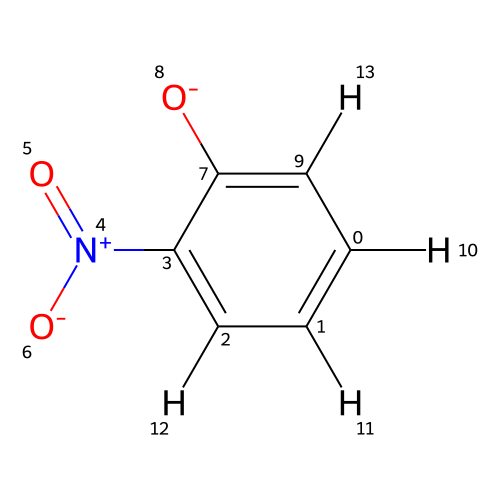

In [99]:
from rdkit.Chem import AllChem
from openbabel import pybel
molmol = Chem.MolFromSmiles(smiles)
molmol = Chem.AddHs(molmol)
molmol

In [100]:
#sssrs = Chem.GetSymmSSSR(molmol)
#for i in range(len(sssrs)):
    #print(list(sssrs[i]))
#print()
##molmol
#molmol_ace = process.get_ace_mol_from_rd_mol(molmol)
#molmol_ace.adj_matrix = molmol_ace.get_adj_matrix()
##molmol_ace.bo_matrix = None
#molmol_ace.atom_feature["chg"] = None
#molmol2 = molmol_ace.get_rd_mol()
#Chem.SanitizeMol(molmol2)
#sssrs2 = Chem.GetSymmSSSR(molmol2)
#for i in range(len(sssrs2)):
    #print(list(sssrs2[i]))
#print()
#sssrs3 = molmol_ace.get_sssr()
#print(sssrs3)
#print()

In [101]:
#Chem.MolToInchiAndAuxInfo(Chem.MolFromSmiles(smitrans))

In [102]:
resolve = bool(resolve)
molecule = chem.Molecule(smiles)
(
    period_list,
    group_list,
    z_list,
    ve_list,
    adj_list,
    bond_list,
    bond_mapping,
    neighbor_list,
    ring_list,
    ring_bond_list
) = compute_chg_and_bo_gurobi.get_lists(molecule)

print(ring_list)

chg_mol = molecule.get_chg()
print("mol chg", chg_mol)
molecule.adj_matrix = molecule.get_adj_matrix()
molecule.atom_feature["chg"] = None
molecule.bo_matrix = None
t = time.time()
(
    chg_list,
    bo_matrix,
    chg_list2,
    bo_matrix2,
) = compute_chg_and_bo_gurobi.compute_chg_and_bo_debug(molecule, chg_mol, resolve=resolve, cleanUp=True, mode="fc")
actobo_time = time.time() - t

#print("hihi", molecule.get_element_list())
#print("hihi", chg_list, len(chg_list))
#print("hihi2", chg_list2, len(chg_list2))
molecule.atom_feature["chg"] = chg_list
molecule.bo_matrix = bo_matrix
rd_actobo1 = molecule.get_rd_mol()

try:
    Chem.SanitizeMol(rd_actobo1)
    smi_actobo = Chem.MolToSmiles(rd_actobo1)
    print(smi_actobo)
    print(smiles == smi_actobo)
    print(actobo_time)
    print()
except Exception as e:
    print("Sanitization Failed")
    print()
    raise e

molecule.atom_feature["chg"] = chg_list2
molecule.bo_matrix = bo_matrix2
rd_actobo2 = molecule.get_rd_mol()
try:
    Chem.SanitizeMol(rd_actobo2)
    smi_actobo = Chem.MolToSmiles(rd_actobo2)
    print(smi_actobo)
    print(smiles == smi_actobo)
    print(actobo_time)
except:
    print("Sanitization Failed")

we cannot give bond order!!!
We will automatically give bond order as 1!
[[1, 12, 10, 6, 4, 2]]
mol chg -1
we cannot give bond order!!!
We will automatically give bond order as 1!
alreadyOctet (array([ 1,  2,  4,  6,  7,  8,  9, 10, 11, 12]),)
alreadyOctet (array([ 1,  2,  4,  6,  7,  8,  9, 10, 11, 12]),)
[H]c1c([H])c([H])c([N+](=O)[O-])c([O-])c1[H]
True
0.01903700828552246

[H]c1c([H])c([H])[c-]([H])c(=O)c1[N+](=O)[O-]
False
0.01903700828552246


we cannot give bond order!!!
We will automatically give bond order as 1!
0 <rdkit.Chem.rdchem.Bond object at 0x7f5c7c151e40>
1 <rdkit.Chem.rdchem.Bond object at 0x7f5c7e48a7b0>
2 <rdkit.Chem.rdchem.Bond object at 0x7f5c7c151e40>
3 <rdkit.Chem.rdchem.Bond object at 0x7f5c7c151f20>
4 <rdkit.Chem.rdchem.Bond object at 0x7f5c7c0f56d0>
5 <rdkit.Chem.rdchem.Bond object at 0x7f5c7c0f57b0>
6 <rdkit.Chem.rdchem.Bond object at 0x7f5c7c0f5970>
7 <rdkit.Chem.rdchem.Bond object at 0x7f5c7c0f5ac0>
8 <rdkit.Chem.rdchem.Bond object at 0x7f5c7c0f5c10>
9 <rdkit.Chem.rdchem.Bond object at 0x7f5c7c0f5900>
10 <rdkit.Chem.rdchem.Bond object at 0x7f5c7c0f5e40>
11 <rdkit.Chem.rdchem.Bond object at 0x7f5c7c0f5f90>
12 <rdkit.Chem.rdchem.Bond object at 0x7f5c777de270>
13 <rdkit.Chem.rdchem.Bond object at 0x7f5c777de2e0>
[1, 12, 10, 6, 4, 2]



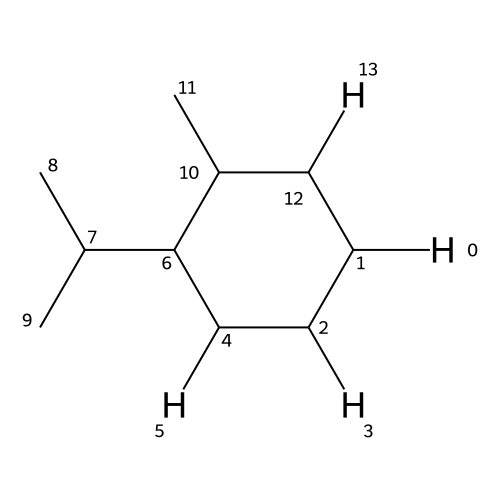

In [103]:
new_z = list(np.where(z_list > 1, 6, 1))
new_adj = molecule.get_adj_matrix()
#print(new_adj)
chg_list = np.zeros(len(new_z))
new = chem.Molecule([new_z, new_adj, None, chg_list])

#print(new.adj_matrix)

new_rd = new.get_rd_mol()
for i, bond in enumerate(new_rd.GetBonds()):
    print(i, bond)
Chem.SanitizeMol(new_rd)
sssrs = Chem.GetSymmSSSR(new_rd)
for i in range(len(sssrs)):
    print(list(sssrs[i]))
print()
new_rd

In [104]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

In [105]:
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.includeRadicals = True
IPythonConsole.molSize = 500, 500

In [112]:
#for i, atom in enumerate(rd_actobo1.GetAtoms()):
#    atom.SetProp("atomLabel", atom.GetSymbol())
rd_actobo1_rH = Chem.RemoveHs(rd_actobo1)
#print(Chem.MolToSmiles(rd_actobo1_rH))
rd_actobo1

'O=[N+]([O-])c1ccccc1[O-]'

In [107]:
#bond_sum = np.sum(bo_matrix, axis=-1)
#lp = (group_list - chg_list - bond_sum)/2
#print(bond_sum[16])
#print(lp[16])
#print(chg_list[16])
##print()
##print(z_list)
##print(lp)
##print(bond_mapping)

In [108]:
#bond_sum2 = np.sum(bo_matrix2, axis=-1)
#lp2 = (group_list - chg_list2 - bond_sum2)/2
#print(bond_sum2[30])
#print(lp2[30])
#print(chg_list2[30])
#print()
#print(bond_mapping)

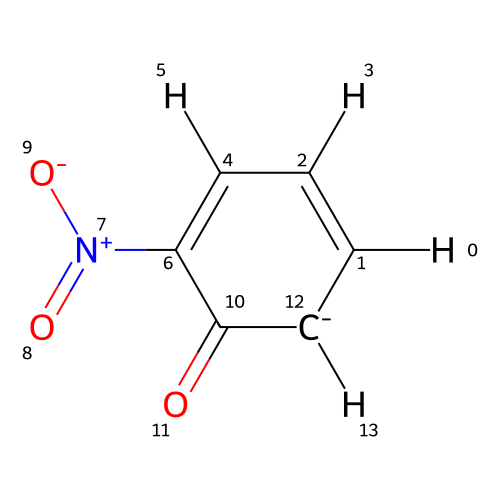

In [109]:
#for i, atom in enumerate(rd_actobo2.GetAtoms()):
#    atom.SetProp("atomLabel", atom.GetSymbol())
#    atom.SetFormalCharge(int(chg_list2[i]))
#rd_actobo2_rH = Chem.RemoveHs(rd_actobo2)
rd_actobo2

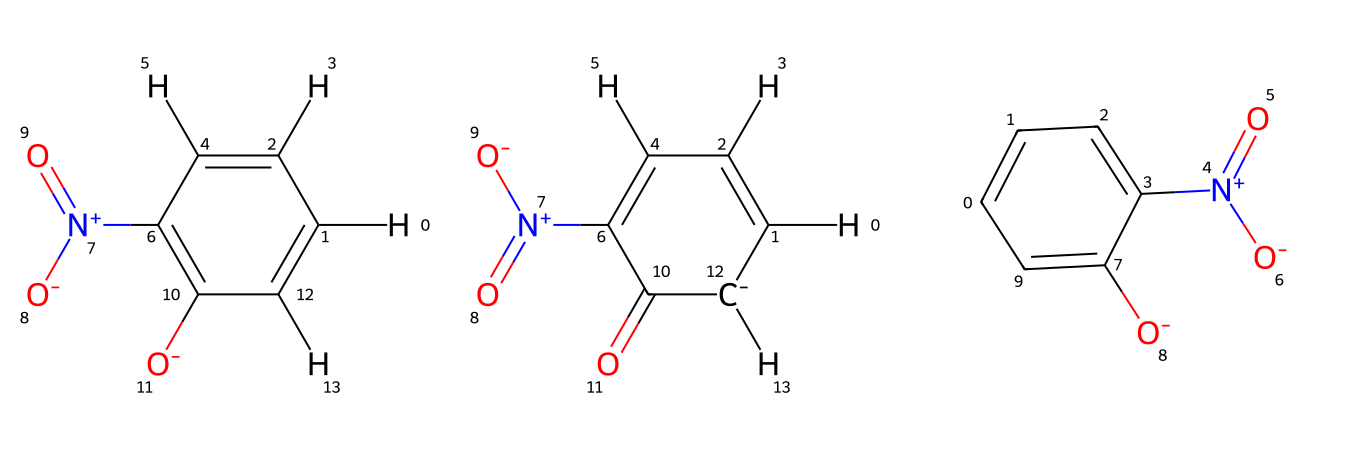

In [110]:
Draw.MolsToGridImage([rd_actobo1, rd_actobo2, Chem.MolFromSmiles(smiles)], subImgSize=(450,450))

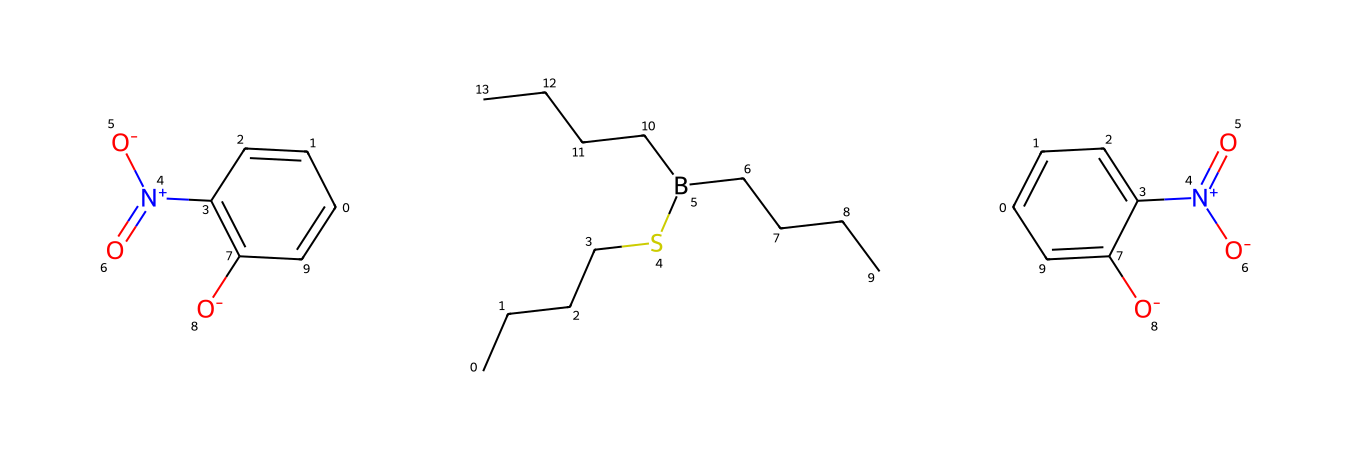

In [111]:
Draw.MolsToGridImage([rd_actobo1_rH, rd_actobo2_rH, Chem.MolFromSmiles(smiles)], subImgSize=(450,450))